### <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

Playstore market is growing every year. Every year, developers are developing new apps to suite the interest of the users. But to have higher growth rate, it is essential to explore the data generated from the Playstore. In this project, we will do an analysis of the Android app market by comparing thousands of apps in Play across different categories. We'll look for insights in the data to devise strategies to drive growth and retain users.

Let's take a look at the data, which consists of two files:

Play Store Data.csv: contains all the details of the applications on PlayStore. There are 13 features that describe a given app. The second file is User reviews.csv: contains many reviews for each app, most helpful first. The text in each review has been pre-processed and attributed with three new features: Sentiment (Positive, Negative or Neutral), Sentiment Polarity and Sentiment Subjectivity.

# Analysis done on dataset:



### To understand the trend of the Playstore market and to accelerate the growth of the apps, we will try to do following 5 analysis on our dataset:

### 1. Finding out the app category which application has maximum installations.

### 2. What are the factors affecting the maximum downloads?

### 3. Exploring the top 5 highest rated free and paid apps.

### 4. Exploring the average rating for each category.

### 5. Understanding the sentiment polarity of the users.

In [1]:
# Mounting the data from drive
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

# Import Libraries

In [5]:
#Importing various libraries in notebook
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# <u>  Read the Data:</u>
There are two datasets.


*   Play Store data
*   User Review




In [6]:
# Reading the data from data-set
df_PlayStore = pd.read_csv("/content/drive/MyDrive/EDA-CAPSTONE PROJECT-1/Play Store Data.csv")
df_UserReview = pd.read_csv("/content/drive/MyDrive/EDA-CAPSTONE PROJECT-1/User Reviews.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/EDA-CAPSTONE PROJECT-1/Play Store Data.csv'

In [ ]:
# Checking the first 5 rows of dataframe
df_PlayStore.head()

In [ ]:
# Checking the last 5 rows in dataframe
df_PlayStore.tail()

In [ ]:
# Checking the number of rows and columns in the dataframe

df_PlayStore.shape

(10841, 13)

In [ ]:
# Checking the different column labels in dataframe

df_PlayStore.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [ ]:
# Extracting information of dataframe column non-null values and datatypes

df_PlayStore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


#<u> Analysis 1. Find out the app category which application has maximum installations.<u>

### So, first of all to try to understand the nature and trend of Playstore market, we will analyse which category of apps is the most popular one among the users.

In [ ]:
# Checking the different column labels in dataframe
df_PlayStore.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [ ]:
# Checking out the unique values from 'Category' column
df_PlayStore['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [ ]:
# Checking the unique values from 'Installs' column
df_PlayStore['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

## Missing data

Important questions when thinking about missing data:

* How prevalent is the missing data?
* Is missing data random or does it have a pattern?

The answer to these questions is important for practical reasons because missing data can imply a reduction of the sample size. This can prevent us from proceeding with the analysis. Moreover, from a substantive perspective, we need to ensure that the missing data process is not biased and hidding an inconvenient truth.

In [ ]:
#missing data
total = df_PlayStore.isnull().sum().sort_values(ascending=False)
percent = (df_PlayStore.isnull().sum()/df_PlayStore.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Rating,1474,0.135965
Current Ver,8,0.000738
Android Ver,3,0.000277
Type,1,0.000092
Content Rating,1,0.000092
App,0,0.000000
Category,0,0.000000
Reviews,0,0.000000
Size,0,0.000000
Installs,0,0.000000


Let's analyse this to understand how to handle the missing data.

We'll consider that when more than 15% of the data is missing, we should delete the corresponding variable and pretend it never existed. This means that we will not try any trick to fill the missing data in these cases. According to this, there is a set of variables (e.g. 'Rating') that we should delete. The point is: will we miss this data? I don't think so. None of these variables seem to be very important, since they are a very very small percentage of the overall data. 

In summary, to handle missing data, we'll delete all the variables with missing data.

In [ ]:
# We will drop rows containing null values

df_PlayStore = df_PlayStore.dropna()

In [ ]:
df_PlayStore.isnull().sum().max() #just checking that there's no missing data missing...

0

In [ ]:
# check the shape
df_PlayStore.shape

(9360, 13)

So, we have removed the rows containing Null or NaN values.

In [ ]:
# Checking the unique values from 'Installs' column
df_PlayStore['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '100+', '500+', '10+',
       '5+', '50+', '1+'], dtype=object)

In [ ]:
# Checking the unique categories
df_PlayStore['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [ ]:
# Getting information of dataframe
df_PlayStore.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1023.8+ KB


As we can see that Installs is of object type. So, we need to convert it into int type. Also we need to remove the + sign at the end of each no. of installation

In [ ]:
def formatting_(x):
  """
  This function would take the each element of installs col. and replace "," with " " and change the type of that as well.
  Function_Name : formatting_
  Return : integer type single element at a time
  argument : Take a string

  """
  if x == '0':
    return int(x)  
  x = x[:-1]
  x = x.replace(',','')
  return int(x)

In [ ]:
df_PlayStore['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '100+', '500+', '10+',
       '5+', '50+', '1+'], dtype=object)

In [ ]:
# Applying the formatting function to 'Installs' column using the lambda function for data refining
df_PlayStore['Installs'] = df_PlayStore['Installs'].apply(lambda x : formatting_(x))

In [ ]:
df_PlayStore['Installs'].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,        100,        500,
               10,          5,         50,          1])

So, now the values in Installs column have been refined by removing the + sign at the end of them and these values can be processed further

In [ ]:
# Applying groupby function on Category column to group according to sum of Installs and getting in descending order 
df_PlayStore.groupby(['Category']).agg({'Installs':'sum'}).sort_values(by = 'Installs',ascending = False).head(5)

,Installs
Category,
GAME,35085862717
COMMUNICATION,32647241530
PRODUCTIVITY,14176070180
SOCIAL,14069841475
TOOLS,11450224500


In [ ]:
# Assigning 10 head value (of Installs and Category) calculated above to a new variable 'df_'

df_ = df_PlayStore.groupby(['Category']).agg({'Installs':'sum'}).sort_values(by = 'Installs', ascending = False).reset_index()
df_ = df_.head(10)
a = df_['Installs']
labels  = df_['Category']
# df_.plot.pie(y = 'Installs', figsize = (16,9),fontsize=22, autopct='%1.0f%%')
# plt.legend(['a','b','c','d','e','f','g','h','i','j'])
# plt.axis('equal')

In [ ]:
df_

,Category,Installs
0,GAME,35085862717
1,COMMUNICATION,32647241530
2,PRODUCTIVITY,14176070180
3,SOCIAL,14069841475
4,TOOLS,11450224500
5,FAMILY,10257651590
6,PHOTOGRAPHY,10088243130
7,NEWS_AND_MAGAZINES,7496210650
8,TRAVEL_AND_LOCAL,6868859300
9,VIDEO_PLAYERS,6221897200


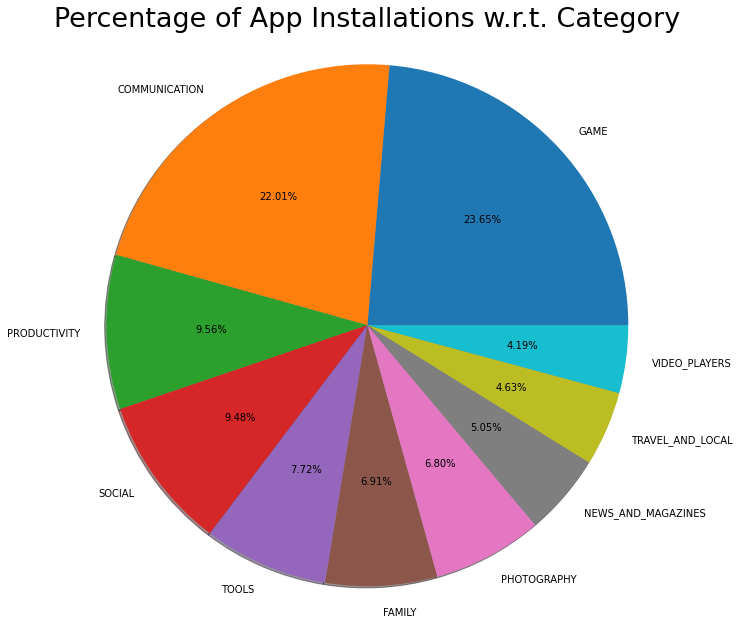

In [ ]:
# Plotting the value calculated above using a pie chart

plt.figure(figsize = (8,4))
plt.title("Percentage of App Installations w.r.t. Category",fontsize = 27 ,pad=190)
plt.pie(a,autopct='%1.2f%%',shadow=True, radius=3,labels = labels);

# <u>  INFERENCE DRAWN:</u>
### So, it can be inferred from the pie chart that the "Game" category apps have maximum installations followed by Communication, Social, Productivity and so on. This hints us about the trend and the mindset of our users.



### So, now our first analysis is complete with an inference.

Before exploring the answer to the second analysis, first we need to clean the data present in some columns

# DATA CLEANING

Before we proceed further to exploration of dataset, let us refine the dataset so that the values can be processed by the tool.

We have formatted the Installs col where you can see the no. of Installs are given in the form of 2000+ ,453+,450000+ like this. We have converted that into 2000, 453, 450000 only so that later on we can apply some arithmetic and other operations

In [ ]:
# checking the largest value count
df_PlayStore['App'].value_counts().nlargest(10)

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
8 Ball Pool                                           7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
ESPN                                                  7
Zombie Catchers                                       6
Bowmasters                                            6
Subway Surfers                                        6
Bleacher Report: sports news, scores, & highlights    6
Name: App, dtype: int64

In [ ]:
df_PlayStore.shape

(9360, 13)

## Handling Data Redundancy

In [ ]:
#checking how many rows have Roblox
df_PlayStore[df_PlayStore['App'] == 'ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,100000000,Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1701,ROBLOX,GAME,4.5,4447346,67M,100000000,Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1748,ROBLOX,GAME,4.5,4448791,67M,100000000,Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1841,ROBLOX,GAME,4.5,4449882,67M,100000000,Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1870,ROBLOX,GAME,4.5,4449910,67M,100000000,Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2016,ROBLOX,FAMILY,4.5,4449910,67M,100000000,Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2088,ROBLOX,FAMILY,4.5,4450855,67M,100000000,Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2206,ROBLOX,FAMILY,4.5,4450890,67M,100000000,Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
4527,ROBLOX,FAMILY,4.5,4443407,67M,100000000,Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


We can see data redundancy since single app is repeating multiple times, but we need to take only single app. So on the basis of some criteria, we choose only single row of app which has more frequently repeating category and maximum reviews.


In [ ]:
dn = df_PlayStore[df_PlayStore['App'] == 'ROBLOX']

In [ ]:
dn

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,100000000,Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1701,ROBLOX,GAME,4.5,4447346,67M,100000000,Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1748,ROBLOX,GAME,4.5,4448791,67M,100000000,Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1841,ROBLOX,GAME,4.5,4449882,67M,100000000,Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1870,ROBLOX,GAME,4.5,4449910,67M,100000000,Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2016,ROBLOX,FAMILY,4.5,4449910,67M,100000000,Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2088,ROBLOX,FAMILY,4.5,4450855,67M,100000000,Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2206,ROBLOX,FAMILY,4.5,4450890,67M,100000000,Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
4527,ROBLOX,FAMILY,4.5,4443407,67M,100000000,Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


In [ ]:
def handling_app_col(df):
  """
  Description : This function would take a dataframe/Series Related to an App. Which would contains duplicates Apps. Our objective is to take only single 
  app Record. This function is designed to take that record having maximum reviews and more frequent Category.
  Arguments : DataFrame/Series
  Return : Series/DataFrame
  Author : Prateek Sachdeva
  """
  cat_ = df['Category']
  count_list = []
  list_cat = list(cat_)
  unique_list = cat_.unique()
  for cat in unique_list:
    count_list.append(list_cat.count(cat))
  a = max(count_list)
  indx = count_list.index(a)
  cat_name = unique_list[indx]  
  df1 = df[df['Category'] == unique_list[0]]
  max_reviews = df1['Reviews'].max()
  return df1[df1['Reviews'] == max_reviews]

In [ ]:
# We pass the App name in function to send the data to handling_app_col function made above to eliminate data redundancy

def create_df_app(app_name):
  d_ = df_PlayStore[df_PlayStore['App'] == app_name]
  return handling_app_col(d_)

In [ ]:
# assigning value to new variable 'd'
d  = df_PlayStore['App'].value_counts().reset_index()

In [ ]:
# making a list of unique apps
list_unique_apps = list(d['index'])
list_unique_apps[0:5]

['ROBLOX',
 'CBS Sports App - Scores, News, Stats & Watch Live',
 '8 Ball Pool',
 'Duolingo: Learn Languages Free',
 'Candy Crush Saga']

In [ ]:
# df = pd.DataFrame()
for app in list_unique_apps:
  data = create_df_app(app)
  if app == 'ROBLOX':
    d = data
  d = d.append(data,ignore_index = True)
print(type(d))  

<class 'pandas.core.frame.DataFrame'>


In [ ]:
d.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,ROBLOX,GAME,4.5,4449910,67M,100000000,Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1,ROBLOX,GAME,4.5,4449910,67M,100000000,Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2,"CBS Sports App - Scores, News, Stats & Watch Live",SPORTS,4.3,91035,Varies with device,5000000,Free,0,Everyone,Sports,"August 4, 2018",Varies with device,5.0 and up
3,8 Ball Pool,GAME,4.5,14201891,52M,100000000,Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
4,Duolingo: Learn Languages Free,EDUCATION,4.7,6290507,Varies with device,100000000,Free,0,Everyone,Education;Education,"August 1, 2018",Varies with device,Varies with device


In [ ]:
 d = d.drop(index=1,axis=0).reset_index(drop = True)

In [ ]:
d.shape

(8587, 13)

In [ ]:
# Making a new variable df_PlayStore_Updated
df_PlayStore_Updated = d.copy()

In [ ]:
df_PlayStore_Updated.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,ROBLOX,GAME,4.5,4449910,67M,100000000,Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1,"CBS Sports App - Scores, News, Stats & Watch Live",SPORTS,4.3,91035,Varies with device,5000000,Free,0,Everyone,Sports,"August 4, 2018",Varies with device,5.0 and up
2,8 Ball Pool,GAME,4.5,14201891,52M,100000000,Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
3,Duolingo: Learn Languages Free,EDUCATION,4.7,6290507,Varies with device,100000000,Free,0,Everyone,Education;Education,"August 1, 2018",Varies with device,Varies with device
4,Duolingo: Learn Languages Free,EDUCATION,4.7,6290507,Varies with device,100000000,Free,0,Everyone,Education;Education,"August 1, 2018",Varies with device,Varies with device


## Handling erroneous data in 'Size' column

In [ ]:
# Checking unique values of size column
df_PlayStore_Updated['Size'].unique() 

array(['67M', 'Varies with device', '52M', '74M', '75M', '76M', '25M',
       '50M', '33M', '62M', '34M', '53M', '15M', '29M', '11M', '97M',
       '70M', '69M', '59M', '21M', '19M', '99M', '23M', '46M', '7.8M',
       '24M', '98M', '95M', '48M', '36M', '78M', '63M', '87M', '18M',
       '10M', '6.6M', '13M', '14M', '6.8M', '40M', '3.3M', '4.0M', '56M',
       '16M', '58M', '12M', '20M', '17M', '38M', '5.5M', '57M', '93M',
       '35M', '96M', '51M', '9.5M', '4.2M', '2.0M', '2.7M', '61M', '91M',
       '100M', '49M', '94M', '37M', '42M', '6.5M', '83M', '41M', '31M',
       '82M', '60M', '27M', '4.9M', '85M', '72M', '88M', '7.1M', '92M',
       '71M', '704k', '2.9M', '5.4M', '32M', '1.8M', '3.8M', '54M', '26M',
       '73M', '68M', '22M', '5.0M', '66M', '43M', '55M', '79M', '30M',
       '7.2M', '44M', '39M', '47M', '7.5M', '7.9M', '1.9M', '4.4M',
       '4.5M', '4.6M', '28M', '5.7M', '9.4M', '4.8M', '2.4M', '8.3M',
       '80M', '6.0M', '5.9M', '8.4M', '4.1M', '8.9M', '9.6M', '2.3M',
 

### I need to convert it into single measure unit. It would be convenient  to covert all of them into kb(kilobytes)

In [ ]:
def convert_into_single_unit(x):
  """ function will take each value from Size column of different sizes. If size varies with device, it will return the same string.
      If size is in MB, it will multiply the value with 1024 to convert it into KB"""
  if x == 'Varies with device':
    return 'Varies with device'
  m_or_b = x[-1]
  x = x[:-1]
  x = float(x)
  if m_or_b == 'M':
    return x*1024
  else:
    return x*1

In [ ]:
df_PlayStore_Updated['Size'] = df_PlayStore_Updated['Size'].apply(lambda x : convert_into_single_unit(x))

In [ ]:
df_PlayStore_Updated['Size'].head(5).reset_index()

,index,Size
0,0,68608.0
1,1,Varies with device
2,2,53248.0
3,3,Varies with device
4,4,Varies with device


In [ ]:
# lets convert last_updated into datetime format
df_PlayStore_Updated['Last Updated'] = pd.to_datetime(df_PlayStore_Updated['Last Updated'])

In [ ]:
df_PlayStore_Updated['Last Updated'].dtype # as we can see now it is a datetime format not object format

dtype('<M8[ns]')

In [ ]:
df_PlayStore_Updated['Size_'] = df_PlayStore_Updated['Size'].replace('Varies with device',np.nan)

In [ ]:
df_PlayStore_Updated.shape

(8587, 14)

In [ ]:
df_PlayStore_Updated = df_PlayStore_Updated.dropna()

In [ ]:
df_PlayStore_Updated.shape

(7296, 14)

We have successfully converted the size format into kb(Kilobytes format), but in some records the size value is 'Varies with device' and if we keep this size format we can not apply arithmetic operations like sum,mean. etc. So, we decided to drop them.



Now, we can start the analysis for the second part

# <u>Analysis 2. What are the factors affecting the maximum downloads?</u>

To understand the factors responsible for the success of app, we need to explore the reasons responsible for it.

First of all, we will analyse **the role of the size of an app**, what impact it has on number of installations

In [ ]:
df_PlayStore_Updated.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Size_'],
      dtype='object')

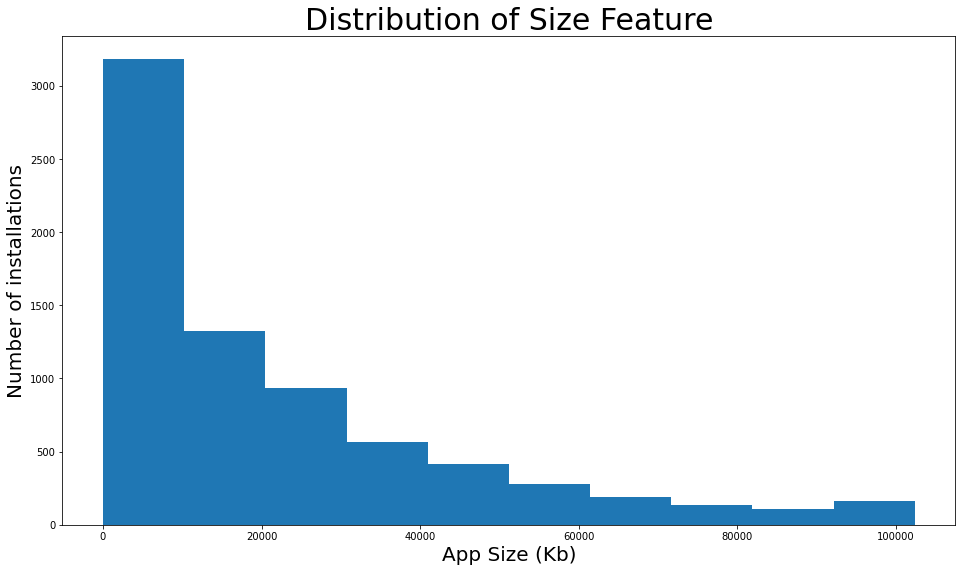

In [ ]:
plt.figure(figsize = (16,9))
plt.hist(df_PlayStore_Updated['Size_'], bins = 10);
plt.xlabel("App Size (Kb)",fontsize = 20)
plt.title("Distribution of Size Feature",fontsize = 30)
plt.ylabel("Number of installations", fontsize =20)
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})

## <u> INFERENCE:</u>

App Size is an important parameter for analysing success of an app. As we can infer from Histogram:
1. The size of app inversely propotional to No. of Installations.

2. If the size of app is less than or equal to 10MB are more likely to be installed (because of their light weight)


Now secondly we will visualize the impact of **Rating on no. of Installations** 

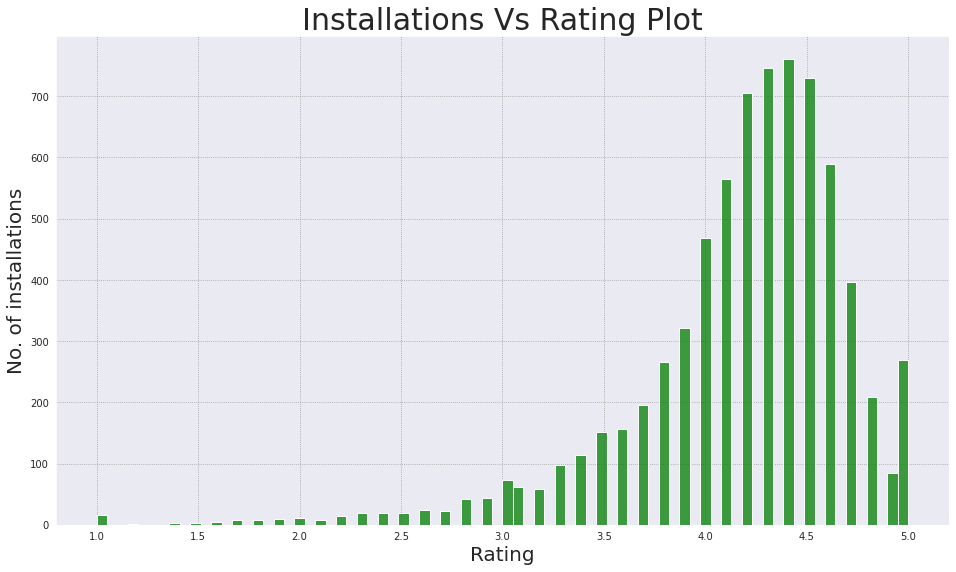

In [ ]:
plt.figure(figsize = (16,9))
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.histplot(x = 'Rating', data = df_PlayStore_Updated, color='green')
plt.title("Installations Vs Rating Plot",fontsize = 30)
plt.xlabel("Rating",fontsize  =20)
plt.ylabel("No. of installations",fontsize  =20);

## INFERENCE:
* From the data Analysis, it can be inferred that the rating of App plays an instrumental role in its success. It is seen that users consider rating of App, an important factor to judge it. Also, the maximum no. of downloads is seen between ratings range of 4.0 to 4.6.

Now, we will try to understand the **significance of Price in success of App**

In [ ]:
df_PlayStore_Updated['Price'].unique()

array(['0', '$5.99', '$12.99', '$24.99', '$3.99', '$2.99', '$9.00',
       '$0.99', '$5.49', '$9.99', '$10.00', '$11.99', '$79.99', '$16.99',
       '$14.99', '$29.99', '$2.49', '$19.99', '$33.99', '$6.99', '$4.99',
       '$3.49', '$7.99', '$1.99', '$1.49', '$8.49', '$4.49', '$8.99',
       '$3.04', '$15.46', '$17.99', '$3.08', '$2.59', '$2.00', '$19.40',
       '$14.00', '$1.75', '$2.56', '$1.97', '$1.20', '$1.00', '$13.99',
       '$4.29', '$3.28', '$4.60', '$2.90', '$10.99', '$15.99', '$1.50',
       '$7.49', '$39.99', '$1.29', '$6.49', '$1.59', '$399.99', '$389.99',
       '$18.99', '$37.99', '$379.99', '$299.99', '$1.70', '$1.76',
       '$3.02', '$4.84', '$1.61', '$4.77', '$3.88', '$400.00'],
      dtype=object)

Data value in Price column have the '$' sign before them. So, we will try to remove that to process the data

In [ ]:
str_ = df_PlayStore_Updated['Price'].unique()[0]

In [ ]:
if str_ == '0':
  print(int(str_))

0


In [ ]:
def price_formating(x):
  """
  This function will take input of price in dollar, then returns price without dollar sign in float format only
  """
  if x == '0':
    return int(x)
  x = x[1:]
  return float(x)  

In [ ]:
df_PlayStore_Updated['Price_Without_Dollar'] = df_PlayStore_Updated['Price'].apply(price_formating)

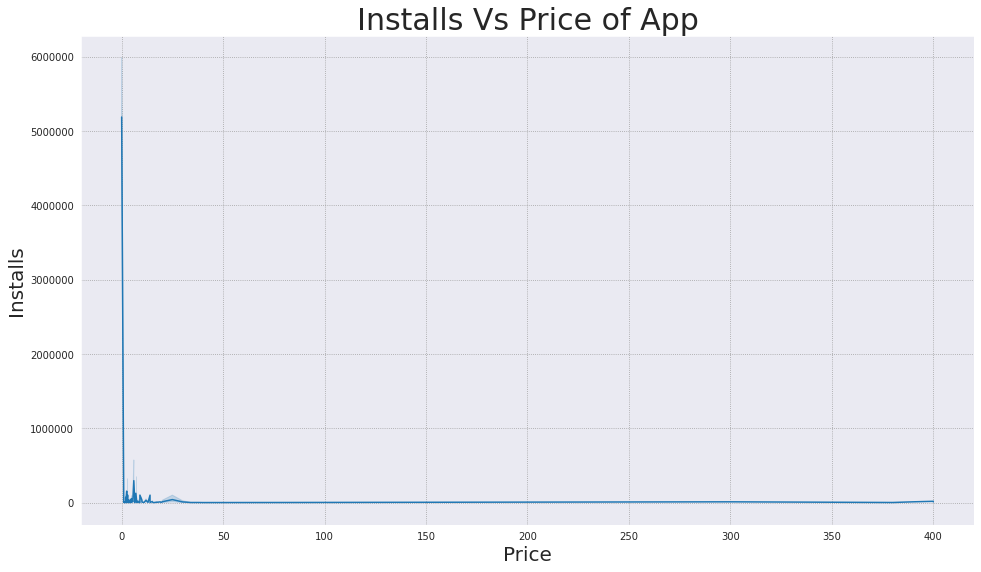

In [ ]:
plt.figure(figsize = (16,9))
ax = sns.lineplot(x = 'Price_Without_Dollar', y= 'Installs', data = df_PlayStore_Updated)
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)
plt.title("Installs Vs Price of App", fontsize = 30)
plt.xlabel("Price",fontsize  =20)
plt.ylabel("Installs",fontsize  =20);

In [ ]:
df_PlayStore_Updated.to_csv('/content/drive/MyDrive/EDA-CAPSTONE PROJECT-1/user_data.csv')

## INFERENCE:
1. If the app is free, then there it is more likely to be installed
2. Paid apps are less likely to be installed.
3. For the paid apps category, the maximum Installations are upto 20 dollars only.

This analysis give us an important idea about the mindset of users and the trend in the market which will help in making the app successful

Now, we will analyse the **impact of giving regular updates in the app**.

In [ ]:
# checking the datatype
df_PlayStore_Updated['Last Updated'].dtype

dtype('<M8[ns]')

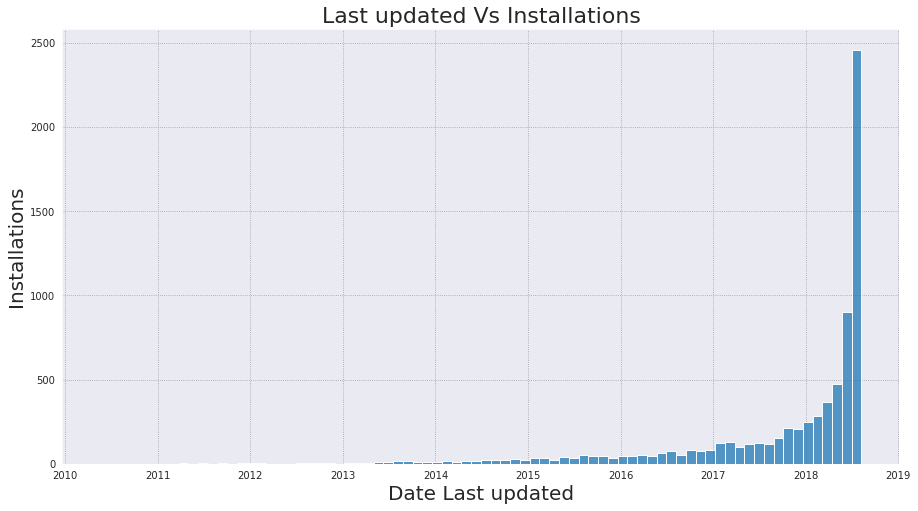

In [ ]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 15,8 # by adding this we do not need to write size again and again
sns.histplot(x = 'Last Updated', data = df_PlayStore_Updated)
plt.title("Last updated Vs Installations", fontsize = 22)
plt.xlabel("Date Last updated",fontsize  =20)
plt.ylabel("Installations",fontsize  =20);

## INFERENCE:
1. It can be understood that if Developers are updating their apps regularly then users show more interest in those apps and install those apps in large numbers.
2. As we can infer from Histplot, developer should give regular updates in their respective app, at least within 1 to 2 years of app launch in order to make it successful.

# <u>Analysis 3. Exploring the top 5 highest rated free and paid apps.</u>

Here, we will try to check which apps are the highest rated free and paid ones.

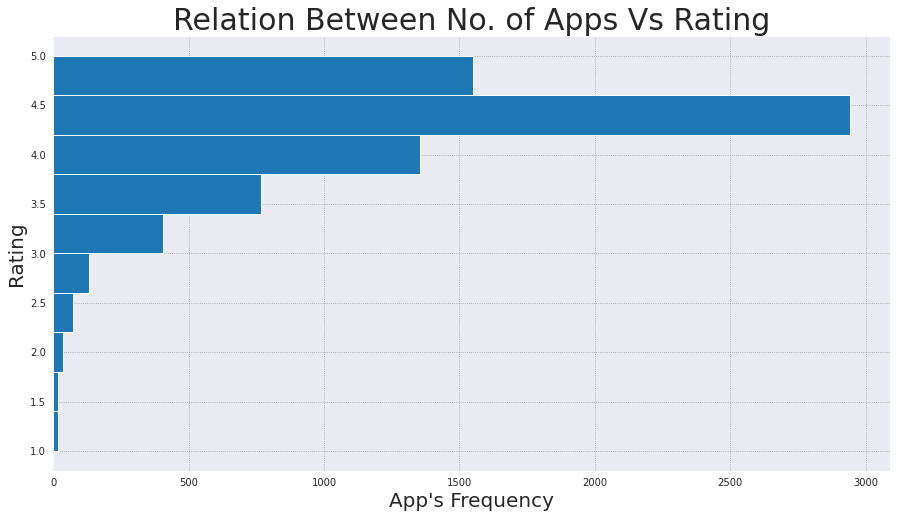

In [ ]:
ax = df_PlayStore_Updated['Rating'].plot(kind = 'hist', orientation="horizontal");
ax.set_xlabel("App's Frequency", fontsize = 20)
ax.set_ylabel("Rating", fontsize = 20)
ax.set_title("Relation Between No. of Apps Vs Rating", fontsize = 30);
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})

### We will be checking that in our playstore, how many apps present are free and how many are paid ones.

In [ ]:
df_PlayStore_Updated['Type']

0       Free
2       Free
6       Free
7       Free
11      Free
        ... 
8582    Paid
8583    Free
8584    Free
8585    Free
8586    Free
Name: Type, Length: 7296, dtype: object

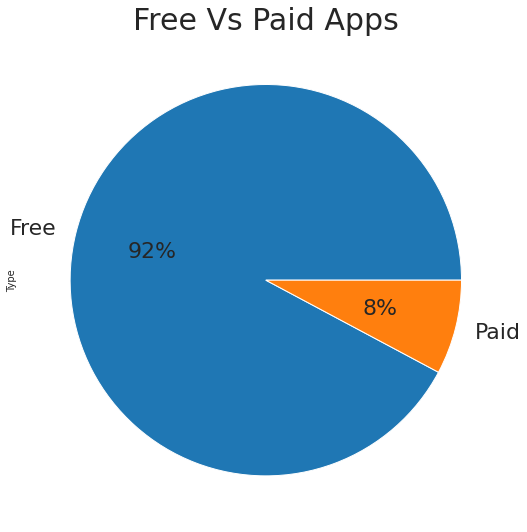

In [ ]:
df_PlayStore_Updated['Type'].value_counts().plot.pie(figsize = (20,9),
            fontsize=22, autopct='%1.0f%%',)
plt.title("Free Vs Paid Apps",fontsize  =30);



### So, its seen that 92% of all apps present in Playstore are free ones and remaining 8% are the paid ones.

In [ ]:
# Top -5 Highest Rated free Apps\

max_rating = df_PlayStore_Updated['Rating'].max()
# print(max_rating)
df_PlayStore_Updated[(df_PlayStore_Updated['Type'] == 'Free') & (df_PlayStore_Updated['Rating'] == max_rating )].head().sort_values(by = 'Rating', ascending=False)[['App','Category'	,'Rating','Type']].reset_index(drop=True)


,App,Category,Rating,Type
0,Sway Medical,MEDICAL,5.0,Free
1,Sway Medical,MEDICAL,5.0,Free
2,420 BZ Budeze Delivery,MEDICAL,5.0,Free
3,420 BZ Budeze Delivery,MEDICAL,5.0,Free
4,BP Journal - Blood Pressure Diary,MEDICAL,5.0,Free


##<u> Top 5 Highest Rated Free Apps</u>

1. DF Glue Board
2. CN Resident	
3. CL Strength
4. Color CL	
5. CP Trivia


In [ ]:
# Top -5 Highest Rated Paid Apps
max_rating = df_PlayStore_Updated['Rating'].max()
# print(max_rating)
df_PlayStore_Updated[(df_PlayStore_Updated['Type'] == 'Paid') & (df_PlayStore_Updated['Rating'] == max_rating )].head().sort_values(by = 'Rating', ascending=False)[['App','Category'	,'Rating','Type']].reset_index(drop=True)


,App,Category,Rating,Type
0,Ra Ga Ba,GAME,5.0,Paid
1,AC DC Power Monitor,LIFESTYLE,5.0,Paid
2,30WPM Amateur ham radio Koch CW Morse code tra...,FAMILY,5.0,Paid
3,Morse Player,FAMILY,5.0,Paid
4,CI 174 Gray Icon Pack,PERSONALIZATION,5.0,Paid


## <u>Top 5 Highest Rated Paid Apps</u>

1. USMLE Step 2 CK Flashcards
2. 211:CK
3. 30WPM Amateur ham radio Koch CW Morse code tra...	
4. Morse Player
5. AC DC Power Monitor	

#<u> Analysis 4. Exploring the average rating for each category.</u>

### To understand the market trend and the interest of users, It is very essential to analyse average rating for each category of respective app.

In [ ]:
# calculate mean of rating
avg_rating = df_PlayStore_Updated['Rating'].mean() 

In [ ]:
df_PlayStore_Updated['Category'].head(10)

0              GAME
2              GAME
6              GAME
7              GAME
11             GAME
13             GAME
14             GAME
20    ENTERTAINMENT
21    ENTERTAINMENT
22    ENTERTAINMENT
Name: Category, dtype: object

In [ ]:
df_cat_rat = df_PlayStore_Updated.groupby('Category').agg({'Rating':'mean'}).reset_index().sort_values(by = 'Rating', ascending = False)

In [ ]:
df_cat_rat.reset_index(drop=True)

,Category,Rating
0,EVENTS,4.478947
1,EDUCATION,4.382524
2,ART_AND_DESIGN,4.381034
3,PARENTING,4.347727
4,PERSONALIZATION,4.324000
5,BOOKS_AND_REFERENCE,4.321127
6,BEAUTY,4.291892
7,SOCIAL,4.254321
8,WEATHER,4.242000
9,GAME,4.237976


In [ ]:
df_top_10 = df_cat_rat.head(10)

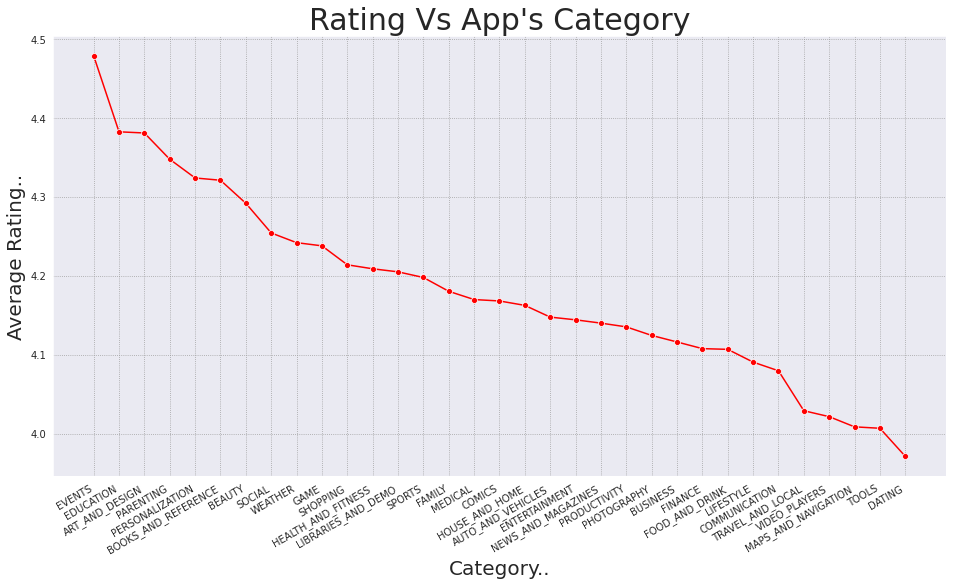

In [ ]:
fig = plt.figure(figsize = (16,9))
sns.lineplot(x = 'Category', y = 'Rating',data = df_cat_rat, color="red", marker='o')
fig.autofmt_xdate()
plt.xlabel("Category..", fontsize = 20)
plt.ylabel("Average Rating..", fontsize = 20)
plt.title("Rating Vs App's Category", fontsize = 30);

## INFERENCE:
1. As we can see the Average Rating of each category and also it is inferred that the **highest rated Category (on an average) is "Events", followed by Education, Arts & Design and so on.**
2. This analysis will reflect the overall rated content of Playstore and the interest of their respective users.


# <u>5. Understanding the sentiment polarity of the users.</u>

Till now, we have been working only on one dataset i.e. PlayStore.
Now, its the time to analyse the second dataset and extract meaningful insights from it.

So, the second dataset provides information on sentiment polarity of the users. Now, we will churn the dataset to determine how people feel about a particular product or app. User reviews for apps can be analyzed to identify if the user mood is positive, negative or neutral about that particular app. For example, positive words in an app review might include words such as 'amazing', 'friendly', 'good' or 'great'. Negative words might be words like 'hate', 'problem', 'waste', and 'bad'.

In [ ]:
df_UserReview.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
pd.set_option("display.max_rows",None)
df_UserReview.tail()


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64222,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667
64223,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222
64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000
64227,Housing-Real Estate & Property,I property business got link SMS happy perform...,Positive,0.800000,1.000000
64230,Housing-Real Estate & Property,"Useless app, I searched flats kondapur, Hydera...",Negative,-0.316667,0.400000


In [ ]:
df_UserReview.shape

(64295, 5)

## Handling missing values

In [ ]:
miss = df_UserReview.isnull().sum().sort_values(ascending = False)
per = df_UserReview.isnull().mean().sort_values(ascending = False)
pd.concat([miss,round(per*100,3)],keys = ['Missing_Values','Percentage'], axis = 1)

,Missing_Values,Percentage
Translated_Review,26868,41.789
Sentiment,26863,41.781
Sentiment_Polarity,26863,41.781
Sentiment_Subjectivity,26863,41.781
App,0,0.000


We can see that a large chunk of data has null or NaN values in it. We can not handles such large volume for processing. 

So, we will simply drop the rows having the missing values.

In [ ]:
df_UserReview = df_UserReview.dropna()

In [ ]:
df_UserReview.shape

(37427, 5)

In [ ]:
df_UserReview.isnull().sum().max() #just checking that there's no missing data missing...

0

In [ ]:
df_UserReview.tail()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64222,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667
64223,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222
64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000
64227,Housing-Real Estate & Property,I property business got link SMS happy perform...,Positive,0.800000,1.000000
64230,Housing-Real Estate & Property,"Useless app, I searched flats kondapur, Hydera...",Negative,-0.316667,0.400000


In [ ]:
# checking if there is any null value
miss = df_UserReview.isnull().sum().sort_values(ascending = False)
per = df_UserReview.isnull().mean().sort_values(ascending = False)
pd.concat([miss,round(per*100,3)],keys = ['Missing_Values','Percentage'], axis = 1)

,Missing_Values,Percentage
App,0,0.0
Translated_Review,0,0.0
Sentiment,0,0.0
Sentiment_Polarity,0,0.0
Sentiment_Subjectivity,0,0.0


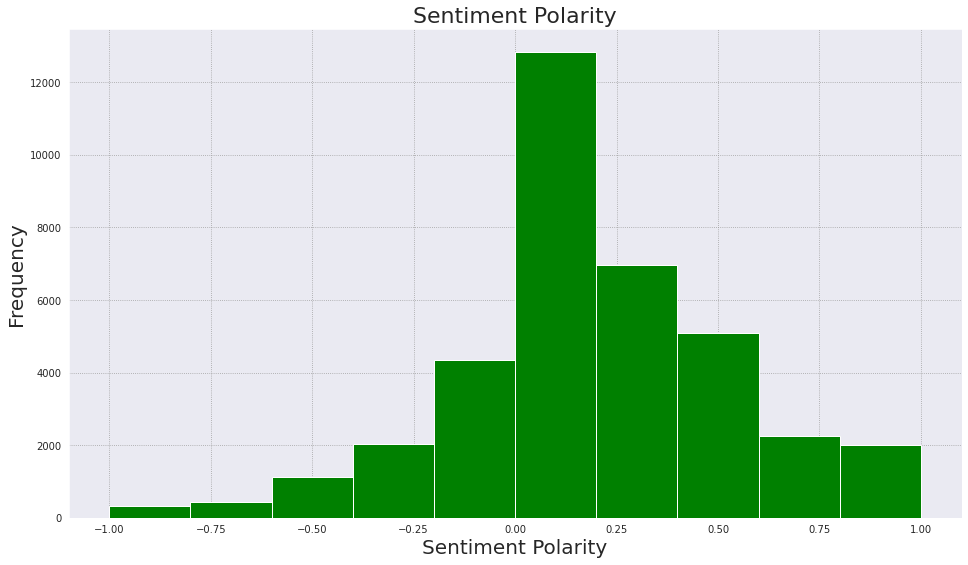

In [ ]:
ax = df_UserReview['Sentiment_Polarity'].plot(kind = 'hist',figsize = (16,9), color = 'green');
ax.set_xlabel("Sentiment Polarity", fontsize = 20)
ax.set_ylabel("Frequency", fontsize = 20)
ax.set_title("Sentiment Polarity", fontsize = 22);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


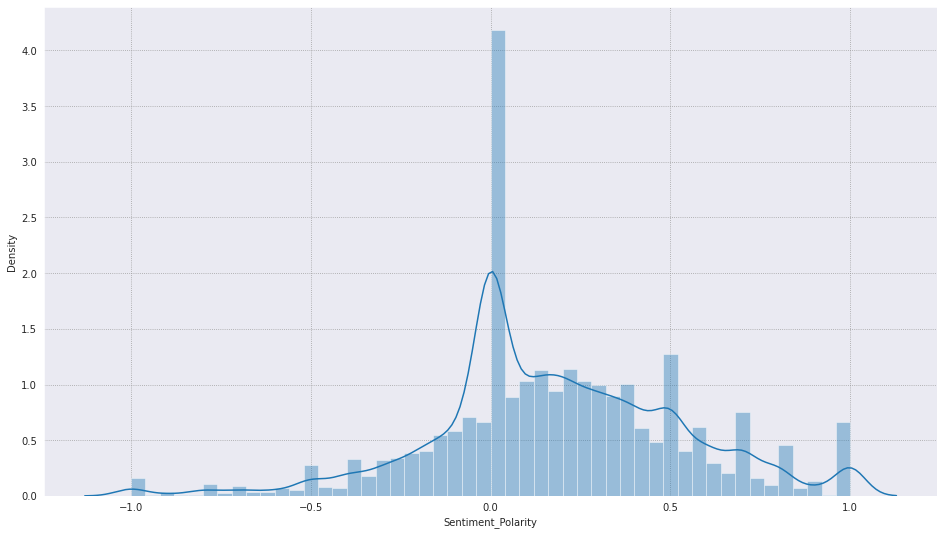

In [ ]:
plt.figure(figsize= (16,9))
sns.distplot(a = df_UserReview['Sentiment_Polarity'],norm_hist = True);

### INFERENCE:
1. Maximum Apps have around  40000 apps reviews Sentiment polarity lies between 0.0 to 0.80 (Neutral to towards Positive)
2. Around 3000 apps reviews Sentiment Ploarity lies between -1 to 0.0 means About 3000 apps have negative sentiment polarity.
3. Mostly Apps Sentiment polarity lies between -0.47 to +.8

# CONCLUSION:

That's it! We reached the end of our exercise. 

So, it can be concluded that:
The "Game" category apps have maximum installations followed by Communication, Social, Productivity and so on.

App Size is an important parameter for analysing success of an app. 
The size of app inversely propotional to No. of Installations.

The rating of App plays an instrumental role in its success. It is seen that users consider rating of App, an important factor to judge it.

Also, the maximum no. of downloads is seen between ratings range of 4.0 to 4.6.
If the app is free, then there it is more likely to be installed
Paid apps are less likely to be installed.

It can be understood that if Developers are updating their apps regularly then users show more interest in those apps and install those apps in large numbers.
Developer should give regular updates in their respective app, at least within 1 to 2 years of app launch in order to make it successful.

The highest rated Category (on an average) is "Events", followed by Education, Arts & Design and so on.
This analysis will reflect the overall rated content of Playstore and the interest of their respective users.

Maximum Apps have around 40000 apps reviews Sentiment polarity lies between 0.0 to 0.80 (Neutral to towards Positive)
Around 3000 apps reviews Sentiment Ploarity lies between -1 to 0.0 means About 3000 apps have negative sentiment polarity.
Mostly Apps Sentiment polarity lies between -0.47 to +.8

This hints us about the trend and the mindset of our users.

It's up to the stakeholder to utilise the findings of this analysis.